# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import datetime
import time
import sys
from scipy import stats
from statsmodels.stats import stattools

# Include py file

In [2]:
from DataStructures import*

# Import Tick data

In [3]:
dir = "https://raw.githubusercontent.com/risk-labratory/data/main/"
url = dir + "IVE_2020.csv"
dataframe = pd.read_csv(url, header = 0)
dataframe['dates'] = pd.to_datetime(dataframe['dates'])
dataframe.set_index('dates', inplace = True, drop = True)
dataframe.drop_duplicates(inplace = True)
dataframe = dataframe[(dataframe.index.hour >= 9) & (dataframe.index.hour<16)]
dataframe.head()

,price,bid,ask,size
dates,,,,
2020-01-02 09:30:00,130.68,130.59,130.60,20625
2020-01-02 09:30:01,130.50,130.50,130.77,200
2020-01-02 09:30:04,130.53,130.52,130.78,100
2020-01-02 09:30:04,130.55,130.52,130.78,100
2020-01-02 09:30:04,130.53,130.52,130.78,200


In [4]:
ohlcvTime = timeBar(dataframe, frequency = "30Min")
ohlcvTime.head(10)

c:\Users\hamid\OneDrive\Coding\RiskLabAI\RiskLabAI-py\Data\Structures\DataStructures.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ohlc['ValueOfTrades'] = tickDataGrouped.apply(lambda x:(x['price']*x['size']).sum()/x['size'].sum()) # find value of trades


,open,high,low,close,volume,ValueOfTrades,PriceMean,TickCount,PriceMeanLogReturn
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.7800,130.3700,130.4299,164048,130.585010,130.558158,262,NaN
2020-01-02 10:00:00,130.4000,130.4000,130.0218,130.0564,75227,130.141558,130.178844,132,-0.002910
2020-01-02 10:30:00,130.0800,130.2000,129.9713,130.2000,91006,130.079069,130.056870,124,-0.000937
2020-01-02 11:00:00,130.2050,130.2089,130.0800,130.1300,65182,130.141968,130.138222,64,0.000625
2020-01-02 11:30:00,130.0833,130.0833,129.9380,130.0300,84253,130.013381,130.016007,59,-0.000940
2020-01-02 12:00:00,130.0215,130.1179,129.9800,130.0732,59420,130.063977,130.075780,60,0.000460
2020-01-02 12:30:00,130.0945,130.1348,130.0420,130.0773,152349,130.084798,130.073998,125,-0.000014
2020-01-02 13:00:00,130.0700,130.0700,129.9566,129.9566,16861,129.995596,129.990660,45,-0.000641
2020-01-02 13:30:00,129.9799,130.0200,129.9400,129.9779,64199,129.969085,129.969793,81,-0.000161


In [5]:
timeBarLen = ohlcvTime.shape[0]
ohlcvTick = tickBar(dataframe, tickPerBar = None, numberBars = timeBarLen)
ohlcvTick.head(10)

,open,high,low,close,volume,ValueOfTrades,PriceMean,TickCount,PriceMeanLogReturn
dates,,,,,,,,,
2020-01-02 09:30:00,130.680,130.7800,130.5000,130.7800,23625,130.672466,130.607500,16,NaN
2020-01-02 09:30:05,130.780,130.7800,130.5200,130.6650,8446,130.647502,130.676562,16,0.000529
2020-01-02 09:30:29,130.660,130.7049,130.6000,130.6200,1982,130.649491,130.647181,16,-0.000225
2020-01-02 09:32:12,130.620,130.6200,130.5600,130.5700,5200,130.574894,130.579031,16,-0.000522
2020-01-02 09:32:51,130.570,130.6100,130.5567,130.5900,5721,130.589296,130.586669,16,0.000058
2020-01-02 09:33:04,130.590,130.6300,130.5900,130.6242,52946,130.609491,130.611506,16,0.000190
2020-01-02 09:33:32,130.640,130.6700,130.5350,130.5500,5886,130.589667,130.604900,16,-0.000051
2020-01-02 09:35:05,130.550,130.5900,130.4800,130.5600,3614,130.536972,130.544238,16,-0.000465
2020-01-02 09:35:54,130.570,130.6200,130.5000,130.5000,5021,130.549199,130.551112,16,0.000053


In [6]:
ohlcvVolume = volumeBar(dataframe, volumePerBar = None, numberBars = timeBarLen)
ohlcvVolume.head(10)

,open,high,low,close,volume,ValueOfTrades,PriceMean,TickCount,PriceMeanLogReturn
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.6800,130.5000,130.5300,21225,130.675571,130.558000,5,NaN
2020-01-02 09:30:04,130.5400,130.7800,130.5200,130.7800,5913,130.716073,130.664444,18,0.000815
2020-01-02 09:30:12,130.5200,130.7400,130.5200,130.5700,8315,130.587541,130.632637,32,-0.000243
2020-01-02 09:32:50,130.5700,130.5900,130.5567,130.5900,6921,130.575836,130.576668,19,-0.000429
2020-01-02 09:33:04,130.6100,130.6200,130.5900,130.6200,6400,130.599844,130.602667,15,0.000199
2020-01-02 09:33:22,130.6100,130.6700,130.5980,130.6700,50546,130.611426,130.637436,14,0.000266
2020-01-02 09:34:09,130.6295,130.6295,130.5350,130.5400,6286,130.566144,130.564275,16,-0.000560
2020-01-02 09:35:17,130.4978,130.6200,130.4500,130.4900,7975,130.531469,130.528919,32,-0.000271
2020-01-02 09:39:53,130.5100,130.5600,130.5100,130.5300,7089,130.530707,130.530645,31,0.000013


In [7]:
ohlcvDollar = dollarBar(dataframe, dollarPerBar = None, numberBars = timeBarLen)
ohlcvDollar.head(10)

,open,high,low,close,volume,ValueOfTrades,PriceMean,TickCount,PriceMeanLogReturn
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.78,130.5000,130.67,24225,130.674262,130.631500,20,NaN
2020-01-02 09:30:05,130.6700,130.78,130.5200,130.52,4846,130.669480,130.660000,4,0.000218
2020-01-02 09:30:12,130.5200,130.74,130.5200,130.59,7182,130.604879,130.629840,35,-0.000231
2020-01-02 09:32:50,130.5700,130.59,130.5567,130.59,6121,130.575292,130.575780,15,-0.000414
2020-01-02 09:33:04,130.6100,130.61,130.5900,130.61,6100,130.599180,130.600769,13,0.000191
2020-01-02 09:33:19,130.6100,130.62,130.6100,130.62,300,130.613333,130.615000,2,0.000109
2020-01-02 09:33:22,130.6100,130.63,130.6100,130.63,48100,130.610042,130.620000,2,0.000038
2020-01-02 09:33:23,130.6300,130.67,130.5350,130.55,5832,130.602522,130.611625,20,-0.000064
2020-01-02 09:35:05,130.5500,130.62,130.4800,130.55,5465,130.545136,130.553600,23,-0.000444


<AxesSubplot:xlabel='dates'>

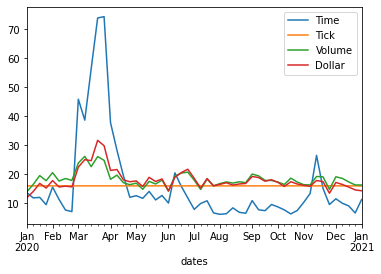

In [12]:
countAverage = pd.DataFrame()
countAverage['Time'] = ohlcvTime.resample("1W")['TickCount'].mean()
countAverage['Tick'] = ohlcvTick.resample("1W")['TickCount'].mean()
countAverage['Volume'] = ohlcvVolume.resample("1W")['TickCount'].mean()
countAverage['Dollar'] = ohlcvDollar.resample("1W")['TickCount'].mean()
countAverage.plot()

In [13]:
# Select a smaller range
startDate = datetime.datetime(2020, 3, 1)
endDate = datetime.datetime(2020, 3, 5)
dataframe2 = dataframe[((dataframe.index >= startDate) & (dataframe.index <= endDate))][['price', 'size']]
dataframe2.drop_duplicates()
dataframe2['ret'] = np.log(dataframe2['price']) - np.log(dataframe2['price'].shift(1))
dataframe2['label'] = np.sign(dataframe2['ret'])
dataframe2['volumelabeled'] = dataframe2['label']*dataframe2['size']
dataframe2['dollarslabeled'] = dataframe2['volumelabeled']*dataframe2['price']
dataframe2.dropna(inplace = True)
dataframe2.head()

,price,size,ret,label,volumelabeled,dollarslabeled
dates,,,,,,
2020-03-02 09:00:12,114.7000,123,0.000087,1.0,123.0,1.410810e+04
2020-03-02 09:30:00,115.2800,26670,0.005044,1.0,26670.0,3.074518e+06
2020-03-02 09:30:07,115.3400,100,0.000520,1.0,100.0,1.153400e+04
2020-03-02 09:30:16,115.2200,100,-0.001041,-1.0,-100.0,-1.152200e+04
2020-03-02 09:30:26,115.2637,172,0.000379,1.0,172.0,1.982536e+04


In [14]:
ohlcv_time = timeBar(dataframe2, frequency = "30Min")
ohlcv_tick = tickBar(dataframe2, tickPerBar = 1000, numberBars = None)
ohlcv_volume = volumeBar(dataframe2, volumePerBar = 10000, numberBars = None)
ohlcv_dollar = dollarBar(dataframe2, dollarPerBar = 500000, numberBars = None)

c:\Users\hamid\OneDrive\Coding\RiskLabAI\RiskLabAI-py\Data\Structures\DataStructures.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ohlc['ValueOfTrades'] = tickDataGrouped.apply(lambda x:(x['price']*x['size']).sum()/x['size'].sum()) # find value of trades


In [2]:
# This line crashes for an unknown reason
# We will seek to fix the issue in the next release
# ohlcvinfo, thetasabsolute, thresholds = infoBar(dataframe2, type = "dollar", tickExpectedInit = 500)

SyntaxError: invalid syntax (146148663.py, line 2)